Brave search: simple gradient tape model<br>
https://www.linkedin.com/pulse/gradient-tape-deploy-descent-tensorflow-vu-hong-quan<br>
https://github.com/quanvu0996/data_science/blob/main/tf/gradient_tape1_en.ipynb

without debug statements

In [1]:
import tensorflow as tf

X = tf.constant([1., 4., 6, 3, 3, 4, 5, 6, 7])
Y = tf.constant([0.25, 1.2, 0.79, 0.52, 1.6, 1.7, 1.9, 2, 2])

# Define the loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

model = tf.keras.Sequential([
    tf.keras.layers.Dense( 1, 
    kernel_initializer='zeros', 
    bias_initializer='zeros')
])

optimizer= tf.optimizers.Adam(learning_rate = .07)

def train_step2(x_true, y_true):
    with tf.GradientTape(persistent =True) as tape:
        # Find prediction value and calculate loss value
        y_pred = model(tf.expand_dims(X,-1))
        loss = loss_fn( tf.expand_dims(Y, -1), y_pred)
        print("Loss: ", loss.numpy())
 
    # calculate partial gradient by each parameter
    variables = model.trainable_variables 
    gradients = tape.gradient(loss, variables)
 
    # update value of each parameter: w1 = w0 - learning_rate * d(loss)/dw
    optimizer.apply_gradients(zip(gradients, variables))

for i in range(5):
    print("Epoch: ", i)
    train_step2(X, Y)
     

2025-09-18 14:42:48.741811: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-18 14:42:48.768907: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch:  0
Loss:  19.457
Epoch:  1
Loss:  10.991247
Epoch:  2
Loss:  5.402445
Epoch:  3
Loss:  2.563472
Epoch:  4
Loss:  2.0541918


with debug statements

Epoch:  0
Loss:  19.457
[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]
Layer: dense_2
Weights: [[0.]]
Bias: [0.]
Epoch:  1
Loss:  10.991247
[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.06999953]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.06999952], dtype=float32)>]
Layer: dense_2
Weights: [[0.06999953]]
Bias: [0.06999952]
Epoch:  2
Loss:  5.402445
[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.13847694]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.13849366], dtype=float32)>]
Layer: dense_2
Weights: [[0.13847694]]
Bias: [0.13849366]
Epoch:  3
Loss:  2.563472
[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.20339632]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shap

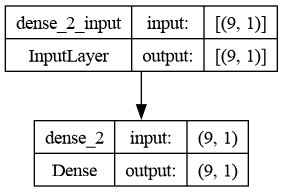

In [5]:
import tensorflow as tf
from keras.utils import plot_model

X = tf.constant([1., 4., 6, 3, 3, 4, 5, 6, 7])
Y = tf.constant([0.25, 1.2, 0.79, 0.52, 1.6, 1.7, 1.9, 2, 2])

# Define the loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

model = tf.keras.Sequential([
    tf.keras.layers.Dense( 1, 
    kernel_initializer='zeros', 
    bias_initializer='zeros')
])

optimizer= tf.optimizers.Adam(learning_rate = .07)

def train_step2(x_true, y_true):
    with tf.GradientTape(persistent =True) as tape:
        # Find prediction value and calculate loss value
        y_pred = model(tf.expand_dims(X,-1))
        loss = loss_fn( tf.expand_dims(Y, -1), y_pred)
        print("Loss: ", loss.numpy())
 
    # calculate partial gradient by each parameter
    variables = model.trainable_variables 
    print(model.trainable_variables) 
    pretty_print(model)
    gradients = tape.gradient(loss, variables)
 
    # update value of each parameter: w1 = w0 - learning_rate * d(loss)/dw
    optimizer.apply_gradients(zip(gradients, variables))

for i in range(5):
    print("Epoch: ", i)
    train_step2(X, Y)

model.build()
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
def pretty_print(model):
    for layer in model.layers:
        weights, biases = layer.get_weights()
        print(f"Layer: {layer.name}")
        print(f"Weights: {weights}")
        print(f"Bias: {biases}")